#### Forward propagation algorithm:


Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. 


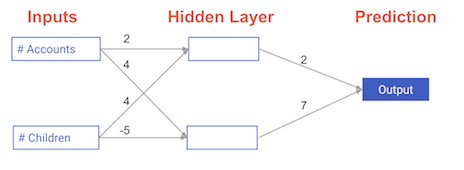


In [ ]:
import numpy as np
input_data = np.array([3, 5])
weights = { 'node_0': np.array([2,4]),
          'node_1': np.array([4,-5]),
          'output': np.array([2,7])}


In [ ]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data* weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)


-39


By next year, user will make 9 transitions.

#### Activation Function: (Rectified Linear Activation Function)

Activation function allows model to caputre non linearities.The rectified linear activation function `(called ReLU)` has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

In [ ]:
input = np.array([3, 5])
weights = { 'node_0': np.array([2,4]),
          'node_1': np.array([4,-5]),
          'output': np.array([2,7])}
def relu(input):
  if input > 0:
    return input
  else:
      return 0
# Calculate the value for the output of the relu function: output
  output = max(0, input)
    
# Return the value just calculated
  return(output)
# Calculate node 0 value: node_0_output
node_0_input = (input * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


In [ ]:
relu(3)

3

In [ ]:
relu(-1)

0

#### Applying the network to many observations/rows of data

We define a function called `predict_with_network()` which will generate predictions for multiple data observations. 

In [30]:

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [31]:
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


#### Forward propagation in a deeper network:

You now have a model with 2 hidden layers. The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines.What prediction would this model make on this data point?

Assume the activation function at each node is the identity function. That is, each node's output will be the same as its input. So the value of the bottom node in the first hidden layer is `-1`, and not `0`, as it would be if the `ReLU activation function` was used.

**ANS: 0**

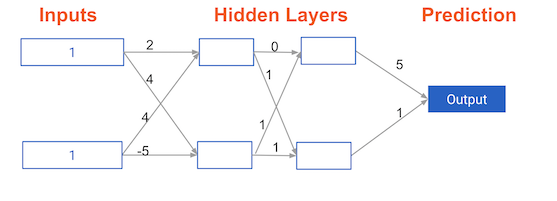

#### Multi-layer neural networks

In [ ]:
import numpy as np
input_data = np.array([3,5])
weights = { 'node_0_0': np.array([2,4]),
           'node_0_1': np.array([4,-5]),
          'node_1_0': np.array([-1,2]),
          'node_1_1': np.array([1,2]),
          'output': np.array([2,7])}

In [ ]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


182


#### The need for optimization**

* Loss function is used to aggregate errors in predictions from many data points into single number.
* Measure of model's predictive performance
* For example MEAN SQUARED ERROR
* Goal find the weights that give the lowest value for the loss function

Using gradient descent algorithm to optimize
**Setps for GD:**
* Start at a random point
* until you are somwhere flat:
  * find the slope
  * take a step downhill

In [32]:
def run_one_step_gradient(input_data, weights, target, learning_rate):
    preds = input_data.dot(weights)
    error = preds - target
    gradient = 2 * input_data * error
    weights_updated  = weights - learning_rate * gradient
    return weights_updated

import numpy as np

weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate  = 0.01
weights_updated = run_one_step_gradient(input_data, weights, target, learning_rate)
for i in range(1, 21):
    weights_updated = run_one_step_gradient(input_data, weights_updated, target, learning_rate)
    pred = input_data.dot(weights_updated)
    print("Step ", i, 'Pred = ', pred, 'Error ', pred- target)

Step  1 Pred =  7.25 Error  1.25
Step  2 Pred =  6.625 Error  0.625
Step  3 Pred =  6.3125 Error  0.3125
Step  4 Pred =  6.15625 Error  0.15625
Step  5 Pred =  6.078125 Error  0.078125
Step  6 Pred =  6.0390625 Error  0.0390625
Step  7 Pred =  6.01953125 Error  0.01953125
Step  8 Pred =  6.009765625 Error  0.009765625
Step  9 Pred =  6.0048828125 Error  0.0048828125
Step  10 Pred =  6.00244140625 Error  0.00244140625
Step  11 Pred =  6.001220703125 Error  0.001220703125
Step  12 Pred =  6.0006103515625 Error  0.0006103515625
Step  13 Pred =  6.00030517578125 Error  0.00030517578125
Step  14 Pred =  6.000152587890625 Error  0.000152587890625
Step  15 Pred =  6.0000762939453125 Error  7.62939453125e-05
Step  16 Pred =  6.000038146972656 Error  3.814697265625e-05
Step  17 Pred =  6.000019073486328 Error  1.9073486328125e-05
Step  18 Pred =  6.000009536743164 Error  9.5367431640625e-06
Step  19 Pred =  6.000004768371582 Error  4.76837158203125e-06
Step  20 Pred =  6.000002384185791 Error  

Have a look at the following neural network:

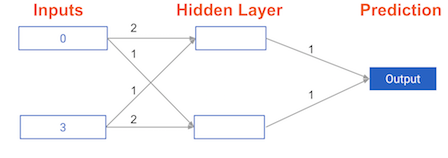

In [ ]:
import numpy as np

def predict_with_network(input_data, weights):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate model output: model_output
    model_output = (hidden_0_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)


In [ ]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             # changed node_1 weight as [1,0]
             'node_1': [1, 0],
             'output': [1,1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)



6
0


**Scaling up to multiple data points**

In [ ]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

weights_0 ={'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}

In [ ]:
from sklearn.metrics import mean_squared_error
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row,weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error (target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


In [ ]:
model_output_0

[9, 9, 0, 12]

In [ ]:
model_output_1

[9.75, 10.0, 0.0, 14.0]

**Calculating slopes**

You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (xb-y)`, or `2 * input_data * error`. Note that `x` and `b` may have multiple numbers (`x` is a vector for each data point, and `b` is a vector). In this case, the output will also be a vector, which is exactly what you want.


In [ ]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0


In [ ]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


**Improving model weights**

We've just calculated the slopes. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

In [ ]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


**Making Multiple updates to weights:**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
input_data = np.array([1, 2, 3])
weights = np.array([-0.49929916,  1.00140168, -0.49789747])
target = 0

In [ ]:
def get_slope(input_data, target, weights):
    # Calculate the predictions: preds
    preds = (weights * input_data).sum()

    # Calculate the error: error
    error = preds - target

    # Calculate the slope: slope
    slope = 2 * input_data * error
    
    return slope

In [ ]:
def get_mse(input_data, target, weights_updated):

    # Get updated predictions: preds_updated
    preds_updated = (weights_updated * input_data).sum()

    # Calculate updated error: error_updated
    error_updated = preds_updated - target
    
    return error_updated

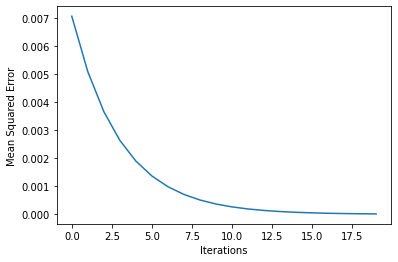

In [ ]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


#### Backpropagation

In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.

This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).

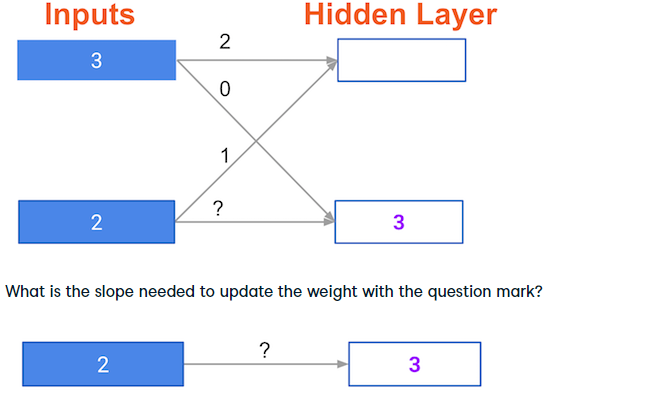

 Ans: 6

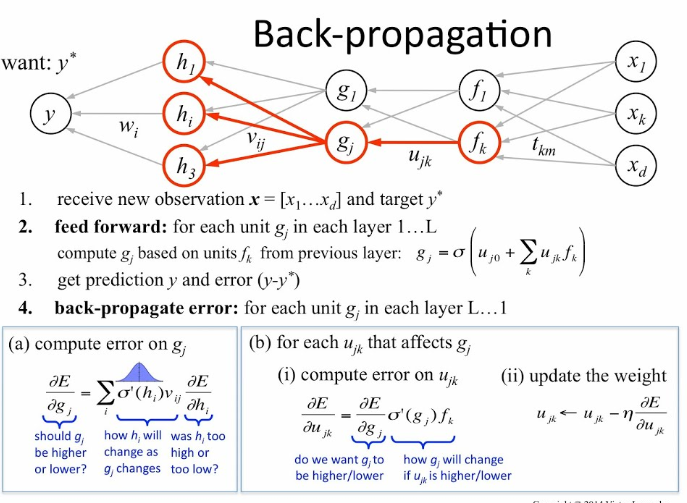

**Backpropagation process**

* Go back one layer at time
* Gradients for weight is product of :
    * Node value feedingg into that weight
    * Slope of loss function w.r.t node it feeds into
    * Slope of activation function at the node it feeds into